# Tripbot Entscheidungsbaum

ir möchten mithilfe eines Entscheidungsbaums das `budget_level` einer Reise für unseren Tripbot vorhersagen.
Dazu nutzen wir verschiedene Merkmale wie Kultur, Abenteuer, Natur, Strände, Nachtleben, Küche, Wellness, Urbanität, Abgeschiedenheit und Scores.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/tripbot_data.csv")
print(df)

                                       id            city         country  \
0    c54acf38-3029-496b-8c7a-8343ad82785c           Milan           Italy   
1    0bd12654-ed64-424e-a044-7bc574bcf078  Yasawa Islands            Fiji   
2    73036cda-9134-46fc-a2c6-807782d59dfb        Whistler          Canada   
3    3872c9c0-6b6e-49e1-9743-f46bfe591b86      Guanajuato          Mexico   
4    e1ebc1b6-8798-422d-847a-22016faff3fd        Surabaya       Indonesia   
..                                    ...             ...             ...   
555  778d28df-a4fa-4328-896e-4a9f80216fda            Maun        Botswana   
556  44fb18eb-2641-46ab-b3fa-df6870ba3c74      Gothenburg          Sweden   
557  8c8c7203-2a45-44ba-9fb2-b5158104375e      Manchester  United Kingdom   
558  ba72b976-10f9-4415-a818-32cf17d8e649      Copenhagen         Denmark   
559  62caf451-c399-4d64-a770-1efd93a603ef           Sucre         Bolivia   

            region   latitude   longitude budget_level  culture  adventure 

## Datenvorbereitung

Wir entfernen irrelevante Spalten wie Ortsnamen und Koordinaten.
Die Zielvariable ist `budget_level`, die Merkmale sind alle übrigen numerischen Bewertungen.


In [4]:
df = df.drop(columns=["id", "city", "country", "region", "latitude", "longitude"])
y = df["budget_level"]
X = df.drop(columns=["budget_level"])

## Trainings- und Testdaten aufteilen

Wir teilen die Daten in Trainings- und Testsets auf, um das Modell später objektiv bewerten zu können.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entscheidungsbaum trainieren

Wir trainieren einen Entscheidungsbaum mit einer maximalen Tiefe von 5.


In [6]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Modellbewertung

Wir bewerten die Vorhersagegenauigkeit des Modells und analysieren die Klassifikationsmetriken wie Präzision, Recall und F1-Score.


In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6488095238095238
              precision    recall  f1-score   support

      Budget       0.52      0.42      0.47        40
      Luxury       0.56      0.23      0.32        22
   Mid-range       0.69      0.82      0.75       106

    accuracy                           0.65       168
   macro avg       0.59      0.49      0.51       168
weighted avg       0.63      0.65      0.63       168



## Entscheidungsbaum visualisieren

Die Visualisierung zeigt, wie der Baum Entscheidungen trifft – z. B. ob hohe Wellness- oder Urban-Scores mit „Luxury“ korrelieren.


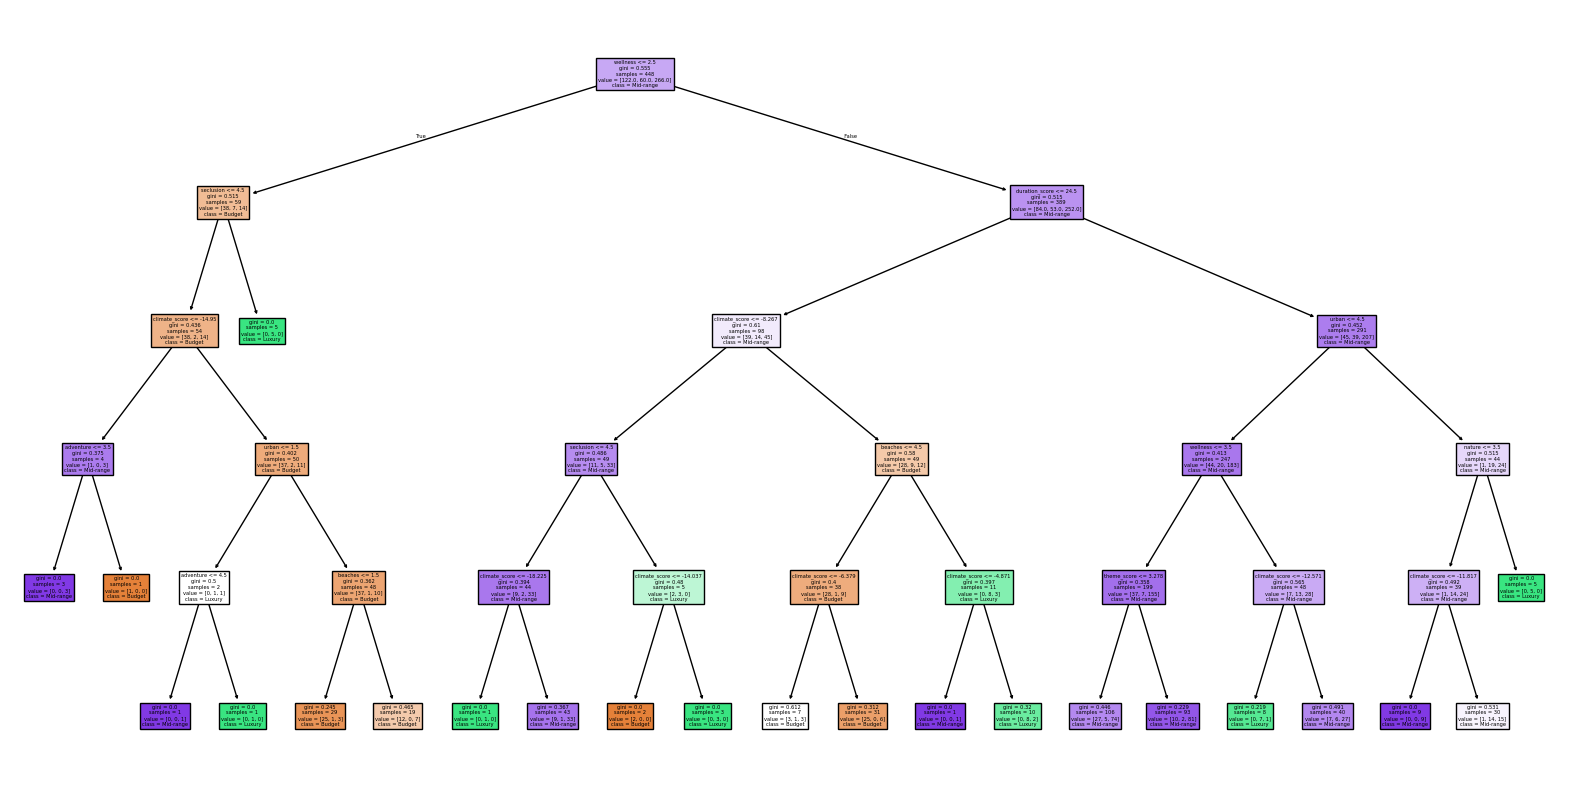

In [71]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()
